In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
# pip install imblearn

In [3]:
df= pd.read_csv("C:/Users/elias/Desktop/COVID-NEWS/raw_data_v2.csv")
df.head(2)


,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...


In [4]:
X=df.drop('Covid',axis=1)

In [5]:
y=df['Covid']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000,ngram_range=(1,3))

In [8]:
X = cv.fit_transform(df['covid_lemmatized']).toarray()

In [9]:
y=df['Covid']

In [10]:
smk_biagram = SMOTETomek(random_state=42)
X_v1,Y_v1=smk_biagram.fit_sample(X,y)

In [11]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(Y_v1)))

Original dataset shape Counter({1: 3245, 0: 827})
Resampled dataset shape Counter({1: 3239, 0: 3239})


In [12]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X_v1,Y_v1,test_size = 0.20, random_state= True)

In [13]:
# Decission Tree Classifier
decession_tree = DecisionTreeClassifier()
decession_tree.fit(x_train,y_train)
y_pred_decession_tree = decession_tree.predict(x_test)
print("Decission Tree Classifier")
print(classification_report(y_test, y_pred_decession_tree))

# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))


# KNN  Algo
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn_classifier = knn_classifier.predict(x_test)
print("KNN  Algo")
print(classification_report(y_test, y_pred_knn_classifier))


# Multinomial Naive Bias
mulNB = MultinomialNB()
mulNB.fit(x_train,y_train)
y_pred_mulNB = mulNB.predict(x_test)
print("Multinomial Naive Bias")
print(classification_report(y_test, y_pred_mulNB))

Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       655
           1       0.92      0.92      0.92       641

    accuracy                           0.92      1296
   macro avg       0.92      0.92      0.92      1296
weighted avg       0.92      0.92      0.92      1296

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       655
           1       0.96      0.91      0.94       641

    accuracy                           0.94      1296
   macro avg       0.94      0.94      0.94      1296
weighted avg       0.94      0.94      0.94      1296

KNN  Algo
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       655
           1       1.00      0.26      0.41       641

    accuracy                           0.63      1296
   macro avg       0.79      0.63      0.57      1296
weighted avg

In [14]:
# Gradient bossting
gradient_bossting = GradientBoostingClassifier(random_state=3)
gradient_bossting.fit(x_train,y_train)
y_pred_gradientbossting = gradient_bossting.predict(x_test)
print("GradientBosting  Algo")
print(classification_report(y_test, y_pred_gradientbossting))


# # SVM
# svm_class = svm.SVC(kernel='poly',probability=True)
# svm_class.fit(x_train,y_train)
# y_pred_svm = svm_class.predict(x_test)
# print("SVM  Algo")
# print(classification_report(y_test, y_pred_svm))


# Logistic Regressor
logis_reg =LogisticRegression()
logis_reg.fit(x_train,y_train)
y_pred_log = logis_reg.predict(x_test)
print("Logistic Reg  Algo")
print(classification_report(y_test, y_pred_log))

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       655
           1       0.97      0.80      0.88       641

    accuracy                           0.89      1296
   macro avg       0.90      0.89      0.89      1296
weighted avg       0.90      0.89      0.89      1296

Logistic Reg  Algo
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       655
           1       0.96      0.90      0.93       641

    accuracy                           0.93      1296
   macro avg       0.93      0.93      0.93      1296
weighted avg       0.93      0.93      0.93      1296



In [15]:
# PAC 
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
linear_clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)

linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# cm = metrics.confusion_matrix(y_test, pred)
# plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


accuracy:   0.931


In [16]:
pac_predictions = linear_clf.predict(x_test)
print('Classification Report:\n',classification_report(y_test, pac_predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, pac_predictions))
print('Accuracy Score:',accuracy_score(y_test, pac_predictions))
print("Precision:",metrics.precision_score(y_test, pac_predictions))
print("Recall:",metrics.recall_score(y_test,pac_predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       655
           1       0.95      0.91      0.93       641

    accuracy                           0.93      1296
   macro avg       0.93      0.93      0.93      1296
weighted avg       0.93      0.93      0.93      1296

Confusion Matrix:
 [[624  31]
 [ 59 582]]
Accuracy Score: 0.9305555555555556
Precision: 0.9494290375203915
Recall: 0.9079563182527302


#### Topic Modelling 

In [21]:

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk import FreqDist
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# Import the wordcloud library
from wordcloud import WordCloud

In [ ]:
'''

The two main inputs to the LDA topic model are
1.The dictionary(id2word)
2.The corpus

Next, we need to generate a document term frequency matrix to create an LDA model. The document term frequency matrix counts how frequently a term appears 
in a document. For that, first, we create a dictionary of documents using the "corpora.Dictionary()" method.

The "Dictionary()" function traverses each document and assigns a unique id to each unique token along with their counts.

Next, the dictionary is converted into a bag-of-words using the "doc2bow()" method. The result is a list of vectors equal to the number of documents. 
Each document vector has a series of tuples with token id and token frequency pair (word_id, word_frequency).

'''

In [23]:
df.head(2)

,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...


In [36]:
nltk.download('tagsets')
nltk.help.upenn_tagset()# tagset documentation
nltk.download('wordnet')
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV
# we will use it later in the loop.
#tag_map

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [40]:
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
 # Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df['covid_token_filtered']] 
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized,lemma
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover,"[[, ', c, o, r, o, n, a, v, i, r, u, s, ', ,, ..."
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...,"[[, ', c, o, r, o, n, a, v, i, r, u, s, ', ,, ..."
2,2,2,"Anguished, I'll always recall our interactions...",0,1,Anguished Ill always recall our interactions P...,Anguished Ill always recall our interactions P...,Anguished Ill always recall our interactions P...,Anguished Ill always recall our interactions P...,anguished ill always recall our interactions p...,anguished ill always recall our interactions p...,anguished ill always recall our interactions p...,"['anguished', 'ill', 'always', 'recall', 'our'...","['anguished', 'ill', 'always', 'recall', 'inte...",anguish ill alway recal interact pm modi rishi...,anguished ill always recall interaction pm mod...,"[[, ', a, n, g, u, i, s, h, e, d, ', ,, , ', ..."
3,3,3,It's a terrible week for Indian cinema: Rahul ...,0,0,Its a terrible week for Indian cinema Rahul Ga...,Its a terrible week for Indian cinema Rahul Ga...,Its a terrible week for Indian cinema Rahul Ga...,Its a terrible week for Indian cinema Rahul Ga...,its a terrible week for indian cinema rahul ga...,its a terrible week for indian cinema rahul ga...,its a terrible week for indian cinema rahul ga...,"['its', 'a', 'terrible', 'week', 'for', 'india...","['terrible', 'week', 'indian', 'cinema', 'rahu...",terribl week indian cinema rahul gandhi rishi ...,terrible week indian cinema rahul gandhi rishi...,"[[, ', t, e, r, r, i, b, l, e, ', ,, , ', w, ..."
4,4,4,Delhi Police perform 'parikrama' of AIIMS to t...,1,1,Delhi Police perform parikrama of AIIMS to tha...,Delhi Police perform parikrama of AIIMS to tha...,Delhi Police perform parikrama of AIIMS to tha...,Delhi Police perform parikrama of AIIMS to tha...,delhi police perform parikrama of aiims to tha...,delhi police perform parikrama of aiims to tha...,delhi police perform parikrama of aiims to tha...,"['delhi', 'police', 'perform', 'parikrama', 'o...","['delhi', 'police', 'perform', 'parikrama', 'a...",delhi polic perform parikrama aiim thank medic...,delhi police perform parikrama aiims thank med...,"[[, ', d, e, l, h, i, ', ,, , ', p, o, l, i, ..."


In [53]:
df['lemma2']= df['lemma'].apply(lambda x: ' '.join(x))

#### Method 1: Create Bag of words using Gensim Package

In [42]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma'])

# Create Corpus
texts = df['lemma']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#### Method 2: Create TF-IDF using Gensim Package

In [43]:
# Applying TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

#### Building the Topic Model

In [44]:

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#### View the topics in LDA model

In [45]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.032*"y" + 0.032*"k" + 0.032*"v" + 0.032*"d" + 0.032*"g" + 0.032*"l" + 0.032*"w" + 0.032*"t" + 0.032*"f" + 0.032*"x"'),
 (1,
  '0.032*"j" + 0.032*"y" + 0.032*"h" + 0.032*"x" + 0.032*"b" + 0.032*"p" + 0.032*"l" + 0.032*"u" + 0.032*"i" + 0.032*" "'),
 (2,
  '0.032*"y" + 0.032*"k" + 0.032*"v" + 0.032*"d" + 0.032*"g" + 0.032*"l" + 0.032*"w" + 0.032*"t" + 0.032*"f" + 0.032*"x"'),
 (3,
  '0.032*"y" + 0.032*"k" + 0.032*"v" + 0.032*"d" + 0.032*"g" + 0.032*"l" + 0.032*"w" + 0.032*"t" + 0.032*"f" + 0.032*"x"'),
 (4,
  '0.200*"\'" + 0.088*" " + 0.088*"," + 0.061*"a" + 0.059*"e" + 0.049*"s" + 0.049*"i" + 0.045*"r" + 0.040*"o" + 0.040*"n"')]

#### Evaluation of Topic Modeling Performance

In [ ]:
'''

1.Compute Model Perplexity :A measure of how good the model is. lower the better
2.Coherence Score:The average /median of the pairwise word-similarity scores of the words in the topic
'''

In [61]:
df.head(2)

,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized,lemma,lemma2
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover,"[[, ', c, o, r, o, n, a, v, i, r, u, s, ', ,, ...","[ ' c o r o n a v i r u s ' , ' c a s e s ' ..."
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...,"[[, ', c, o, r, o, n, a, v, i, r, u, s, ', ,, ...","[ ' c o r o n a v i r u s ' , ' c a s e s ' ..."


In [63]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemma'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -2.915654177211852

Coherence Score:  0.24293606617828162


#### Visualize the topics-keywords

In [ ]:
'''


From the below output, the bubbles on the left-side represents a topic and larger the bubble, the more prevalent is that topic. The topic model will be good if the topic model has big, non-overlapping bubbles scattered throughout the chart.
'''

In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4      0.100334  0.0       1        1  99.992676
1     -0.025084 -0.0       2        1   0.003228
0     -0.025083 -0.0       3        1   0.001384
3     -0.025083 -0.0       4        1   0.001359
2     -0.025083  0.0       5        1   0.001353, topic_info=   Term          Freq         Total Category  logprob  loglift
1     '  67404.000000  67404.000000  Default   30.000  30.0000
0        29706.000000  29706.000000  Default   29.000  29.0000
2     ,  29706.000000  29706.000000  Default   28.000  28.0000
5     a  20481.000000  20481.000000  Default   27.000  27.0000
7     e  19820.000000  19820.000000  Default   26.000  26.0000
..  ...           ...           ...      ...      ...      ...
7     e      0.147269  19820.406250   Topic5   -3.434  -0.5990
5     a      0.147269  20481.394531   Topic5   -3.434  -0.6318
2     ,      0.147269  29706.458984   Topic5   -3.434  -1.0037
0            0.147269  29706.458984   Topic5   -3.434  -1.0037
1     '      0.147269  67404.906250   Topic5   -3.434  -1.8230

[184 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.999985     
1         1  0.999987    '
2         1  0.999985    ,
3         1  0.999895    [
4         1  0.999895    ]
5         1  0.999981    a
26        1  0.999723    b
6         1  0.999910    c
19        1  0.999917    d
7         1  0.999979    e
27        1  0.999435    f
20        1  0.999722    g
8         1  0.999836    h
9         1  0.999975    i
10        1  0.999703    j
24        1  0.999825    k
21        1  0.999913    l
25        1  0.999938    m
11        1  0.999963    n
12        1  0.999918    o
13        1  0.999832    p
30        1  0.997707    q
14        1  0.999932    r
15        1  0.999951    s
16        1  0.999923    t
17        1  0.999873    u
18        1  0.999870    v
22        1  0.999837    w
28        1  0.998072    x
23        1  0.999750    y
29        1  0.995257    z, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

#### How to find the optimal number of topics for LDA?

In [50]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

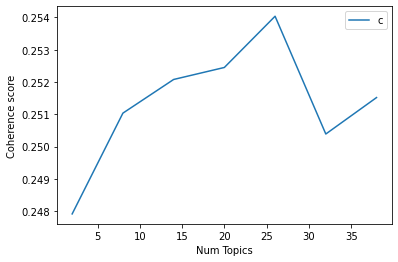

In [51]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemma'], start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2479
Num Topics = 8  has Coherence Value of 0.251
Num Topics = 14  has Coherence Value of 0.2521
Num Topics = 20  has Coherence Value of 0.2525
Num Topics = 26  has Coherence Value of 0.254
Num Topics = 32  has Coherence Value of 0.2504
Num Topics = 38  has Coherence Value of 0.2515


#### Finding the dominant topic in each sentence

In [ ]:
#We find the topic number that has the highest percentage contribution in that document.

In [56]:
data=df['clean_covid_v6']
optimal_model = model_list[3]
# Convert to list
data = list(df['lemma2'])
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.5159,"', , a, ,, s, e, r, i, h, t","[ ' c o r o n a v i r u s ' , ' c a s e s ' ..."
1,1,3.0,0.4955,"', , ,, e, a, s, o, i, t, d","[ ' c o r o n a v i r u s ' , ' c a s e s ' ..."
2,2,6.0,0.3906,"', , a, ,, s, e, r, i, h, t","[ ' a n g u i s h e d ' , ' i l l ' , ' a ..."
3,3,7.0,0.3945,"', ,, , a, i, e, n, o, r, t","[ ' t e r r i b l e ' , ' w e e k ' , ' i ..."
4,4,6.0,0.5398,"', , a, ,, s, e, r, i, h, t","[ ' d e l h i ' , ' p o l i c e ' , ' p e ..."
5,5,14.0,0.8514,"', , ,, e, i, o, f, d, n, c","[ ' m p ' , ' g o v e r n m e n t ' , ' o ..."
6,6,7.0,0.4380,"', ,, , a, i, e, n, o, r, t","[ ' k ' , ' l a b o u r e r s ' , ' s t u ..."
7,7,3.0,0.8258,"', , ,, e, a, s, o, i, t, d","[ ' n e w ' , ' c o v i d ' , ' c a s e s ..."
8,8,0.0,0.6493,"', ,, , a, e, l, r, o, s, t","[ ' j o u r n a l i s t ' , ' a m o n g ' , ..."
9,9,3.0,0.4494,"', , ,, e, a, s, o, i, t, d","[ ' m a h a s ' , ' n a s h i k ' , ' d i ..."


#### Find the most representative document for each topic

In [ ]:
# Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, we can find the documents a given topic has contributed to the most and infer the topic by reading that document

In [57]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9917,"', ,, , a, e, l, r, o, s, t","[ ' n o b e l ' , ' l a u r e a t e ' , ' ..."
1,3.0,0.9875,"', , ,, e, a, s, o, i, t, d","[ ' d o n t ' , ' h a p p y ' , ' d e l h ..."
2,6.0,0.9883,"', , a, ,, s, e, r, i, h, t","[ ' m a h a r a s h t r a ' , ' p h a r m a ..."
3,7.0,0.9916,"', ,, , a, i, e, n, o, r, t","[ ' t r a g i c ' , ' s i t u a t i o n ' , ..."
4,9.0,0.9221,"', e, n, ,, , d, s, i, u, r","[ ' n u m b e r ' , ' c o n t a i n m e n t ..."
5,13.0,0.7068,"', e, d, t, , a, i, ,, n, c","[ ' b e n g a l ' , ' a t t e n d e d ' , ..."
6,14.0,0.9827,"', , ,, e, i, o, f, d, n, c","[ ' f o o d ' , ' g i v e n ' , ' n e e d ..."
7,16.0,0.9886,"', , ,, i, e, r, n, o, s, t","[ ' p r e p a r e d ' , ' c l o s e l y ' , ..."
8,18.0,0.9887,"', ,, a, i, , n, s, t, o, r","[ ' g o v t ' , ' i n t e n d s ' , ' s e ..."


In [ ]:
'''
The tabular output above actually has 20 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. 
The Perc_Contribution column is nothing but the percentage contribution of the topic in the given document.
'''

In [58]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
#df_dominant_topics.sort_values(by=['Dominant_Topic'], inplace=True)
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,6.0,"', , a, ,, s, e, r, i, h, t",489.0,0.1201
1.0,3.0,"', , ,, e, a, s, o, i, t, d",NaN,NaN
2.0,6.0,"', , a, ,, s, e, r, i, h, t",NaN,NaN
3.0,7.0,"', ,, , a, i, e, n, o, r, t",696.0,0.1709
4.0,6.0,"', , a, ,, s, e, r, i, h, t",NaN,NaN
5.0,14.0,"', , ,, e, i, o, f, d, n, c",NaN,NaN
6.0,7.0,"', ,, , a, i, e, n, o, r, t",697.0,0.1712
7.0,3.0,"', , ,, e, a, s, o, i, t, d",624.0,0.1532
8.0,0.0,"', ,, , a, e, l, r, o, s, t",NaN,NaN
9.0,3.0,"', , ,, e, a, s, o, i, t, d",93.0,0.0228


#### Frequency Distribution of Word Counts in Documents

Mean   : 165.0
Median : 165.0
Stdev   : 24.0
1%ile    : 103.0
99%ile  : 213.0


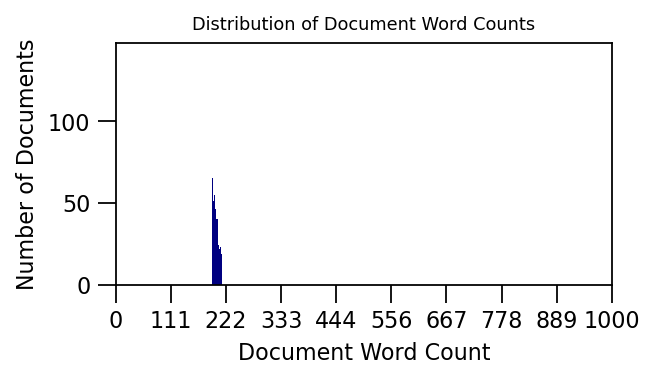

In [60]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(4,2), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
print( "Mean   : " + str(round(np.mean(doc_lens))))
print( "Median : " + str(round(np.median(doc_lens))))
print(  "Stdev   : " + str(round(np.std(doc_lens))))
print( "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
print( "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=8)
plt.xticks(np.linspace(0,1000,10))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=8))
plt.show()